In [13]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

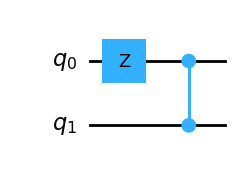

In [14]:
# x gate - not [qc.x]
qc = QuantumCircuit(2)
qc.z(0)
qc.cz(0, 1)
qc.draw(output='mpl')

In [15]:
matrix = Operator(qc).data
# print(matrix @ np.array([1, 1, 1, 1]))
matrix

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

## Phase Oracles
I will describe them more precisely during the presentation

In [16]:
def my_oracle_1():
    circuit = QuantumCircuit(3)
    circuit.x(0)
    circuit.x(1)
    circuit.cz(0,1)
    return circuit

def my_oracle_2():
    circuit = QuantumCircuit(3)
    circuit.cz(0,2)
    return circuit

def my_oracle_3():
    circuit = QuantumCircuit(4)
    circuit.x(2)
    circuit.ccz(0,1,2)
    circuit.x(2)
    circuit.x(0)
    circuit.ccz(0,2,3)
    circuit.x(0)
    return circuit

In [17]:
def check_oracle(oracle:QuantumCircuit, output:np.ndarray):
    base_state = np.array([1] * len(output))
    matrix = Operator(oracle).data
    assert (matrix @ base_state == output).all(), "The matrix is incorrect"

In [18]:
oracle = my_oracle_1()
matrix = Operator(oracle).data
# check_oracle(oracle, np.array([-1, 1, 1, 1, -1, 1, 1, 1]))
# oracle.draw(output='mpl')

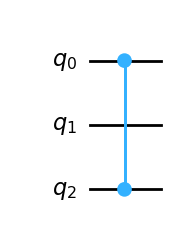

In [19]:
oracle = my_oracle_2()
check_oracle(oracle, np.array([1, 1, 1, 1, 1, -1, 1, -1]))
oracle.draw(output='mpl')

In [20]:
# matrix = Operator(oracle).data
# print(matrix @ np.array([1, 1, 1, 1, 1, 1, 1, 1]))
# check_oracle(oracle, np.array([1, 1, 1, 1, 1, -1, 1, -1]))
# matrix

[ 1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j]


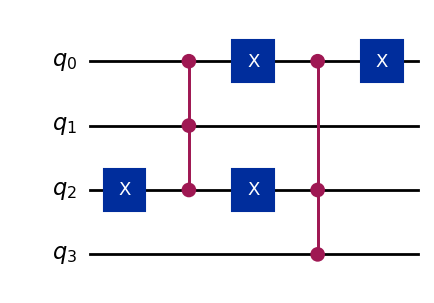

In [21]:
oracle = my_oracle_3()
# check_oracle(oracle, np.array([1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1]))
matrix = Operator(oracle).data
print(matrix @ np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
matrix
oracle.draw(output='mpl')

### QCMC Problem
Let's focus on create our desired state. Let's start with something simple:

Try to get this probability distributions:
- Task 1
    - 00 - 50%
    - 11 - 50%
- Task 2
    - 000 - 25%
    - 001 - 25%
    - 010 - 50%
- Task 3
    - 001 - 25%
    - 010 - 25%
    - 100 - 25%
    - 111 - 25%

In [22]:
def task1():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0,1)
    
    return qc

def task2():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.h(1)
    qc.cx(0,2)
    qc.cx(1,2)
    qc.h(0)

    return qc

def task3():
    qc = QuantumCircuit(3)
    qc.h(0)           
    qc.h(1)           
    qc.ccz(0, 1, 2) 
    return qc

In [23]:
def check_probability(qc:QuantumCircuit, output:np.ndarray):
    base_state = np.array([0] * len(output))
    base_state[0] = 1
    matrix = Operator(qc).data
    print(matrix @ base_state)
    assert np.isclose(matrix @ base_state, np.sqrt(output)).all(), "The matrix is incorrect"
# check_probability(task1(), np.array([1/2, 0, 0, 1/2]))
# check_probability(task2(), np.array([1/4, 1/4, 1/2, 0, 0, 0, 0, 0]))
# check_probability(task3(), np.array([0, 1/4, 1/4, 0, 1/4, 0, 0, 1/4]))

Now let's try to make our custom probabilities like:

- Task 0 (hard)
    - 0 - 33%
    - 1 - 67%
- Task 1 (hard)
    - 001 - 33.(3)%
    - 010 - 33.(3)%
    - 100 - 33.(3)%
- Task 2 (hard)
    - 001 - 13%
    - 011 - 11%
    - 110 - 53%
    - 111 - 23%

In [24]:
def rx(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]])


def calc(state):
    return abs(abs(state)**2)[1]

def calculate_probability(theta):
    return np.sin(theta/2)**2

base_state = np.array([1, 0])

base_state = rx(np.pi * 1/2) @ base_state
calc(base_state)

0.4999999999999999

In [26]:
# def find_theta(probability:float) -> float:
#     # TODO ...
#     return ...

# assert np.isclose(calculate_probability(find_theta(0.1)), 0.1)
# assert np.isclose(calculate_probability(find_theta(0.3)), 0.3)
# assert np.isclose(calculate_probability(find_theta(0.5)), 0.5)
# assert np.isclose(calculate_probability(find_theta(0.81)), 0.81)

## Build your own Quantum Simulator

We can simulated behaviour of quantum circuits by multiplying the gate matrices $M$ by entry vector $\ket{0}$

To make a simulator for single qubit's we just need to get dot product of gates in correct order

You can use $M$ @ $\ket{0}$

In [ ]:
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
Z = np.array([[1, 0], [0, -1]])
Y = np.array([[0, -1j], [1j, 0]])

Now simulate such circuit:

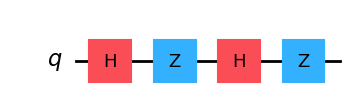

In [28]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.z(0)
qc.draw('mpl')

In [49]:
# state = H
# state = np.matmul(state, Z)
# state = np.matmul(state, H)
# state = np.matmul(state, Z)
# print(np.matmul(state, [1,0]))
state = H
state = np.matmul(CNOT, state)
state = np.matmul(np.kron(I,H), state)
print(np.matmul(state, [1,0,0,0]))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)

What is the result?

Now let's move to simulating multi-qubit circuits, the rule is simmilar, but we can only apply transofrmation state, so we need to change our matrices to match the size of input.

We can achive it by using function `np.kron`

Remember that if we have 2-qubit gates as CNOT, we don't need to make this operation, as the size already matches

In [42]:
np.kron(I, X) # TWo matrixes

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

Try to make this circuit:

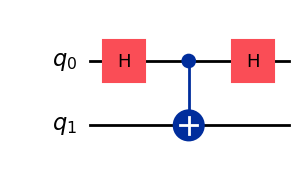

In [31]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.h(0)
qc.draw('mpl')

So when you know how to combine gates to match the input, how about creating some more advanced quantum simulator? as for example n-qubit simulator?

In [ ]:
# TODO: implement the quantum simulator :o
class Simulator:
    def __init__(self, num_qubits:int):
        self.num_qubits = num_qubits
    
    def x(self, qubit:int):
        ...
        
    def h(self, qubit:int):
        ...
    
    def z(self, qubit:int):
        ...
        
    def y(self, qubit:int):
        ...
    
    def cx(self, control_qubit:int, target_qubit:int):
        ...
    
    def calculate_probability_vector(self) -> np.ndarray:
        ...

In [ ]:
my_simulator = Simulator(2)
my_simulator.h(0)
my_simulator.cx(0, 1)
assert my_simulator.calculate_probability_vector() == np.array([0.5, 0, 0, 0.5])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Contragulations !!!
You can now simlator the behaviour of quantum circuits, and create perfect error-less results

Now, let's simulate some amount of qubits, how about ... 25?

Does it work fast?

How about 30, 35, 40, 45?

**Tip: take a look into your computer's memory**